In [15]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached contourpy-1.2.1-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/165.5 kB ? eta -:--:--
     --------------------- ----------------- 92.2/165.5 kB 1.0 MB/s eta 0:00:01
     -------------------------------------- 165.5/165.5 kB 1.4 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
    --------------------------------------- 0.2/8.0 MB 3.9 MB/s eta 0:00:02
   - -------------------------------------- 0.3/8.0 MB 4.2 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/8.0 MB 4.0 MB/s eta 0:00:02
   --- ------------------------------


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\New\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('D:/python practice/data file/salary.csv')

In [3]:
df.shape

(32561, 5)

In [4]:
df.head(2)

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K


In [5]:
df.columns

Index(['age', 'education.num', 'capital.gain', 'hours.per.week', 'income'], dtype='object')

In [6]:
income_set = set(df['income'])
df['income'] = df['income'].map({'<=50K':0, '>50K':1}).astype(int)

In [7]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [8]:
type(x)

numpy.ndarray

In [11]:
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [12]:
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train

array([[-0.06331711],
       [-0.07714102],
       [-0.07793856],
       ...,
       [-0.07554596],
       [ 1.86219481],
       [-0.06730478]])

In [16]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

for i in range(1,40):
    modal = KNeighborsClassifier(n_neighbors=i)
    modal.fit(x_train,y_train)
    pred_i = modal.predict(x_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color = 'red', linestyle = 'dashed',marker = 'o',markerfacecolor = 'blue',marksize =10)
plt.title('Error Rate K value')
plt.xlabel('k value')
plt.ylabel('Mean Error')    

Matplotlib is building the font cache; this may take a moment.


ValueError: Found input variables with inconsistent numbers of samples: [97680, 8141]

x_train shape: (26048, 4)
x_test shape: (6513, 4)
y_train shape: (26048,)
y_test shape: (6513,)


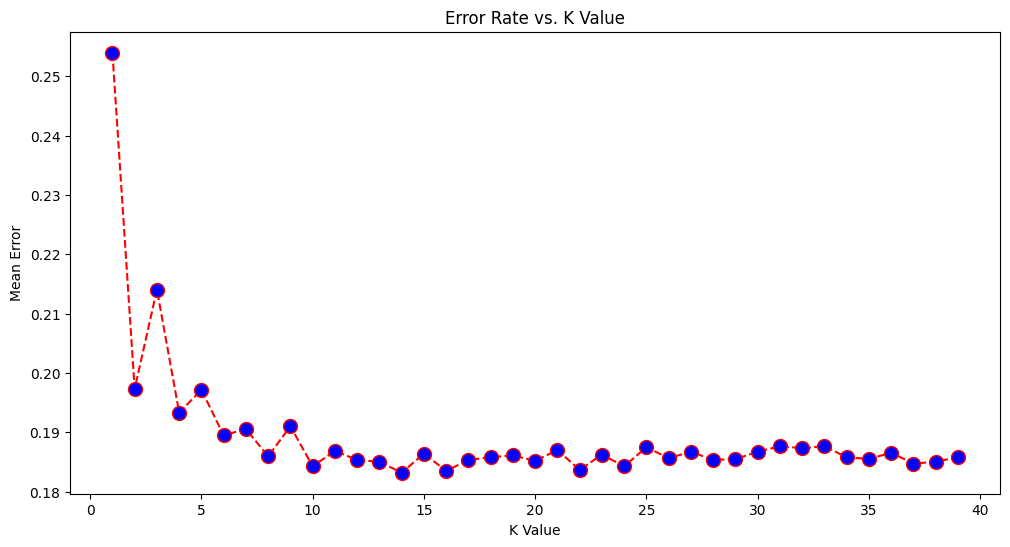

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

df

# Define features and target
X = df[['age', 'education.num', 'capital.gain', 'hours.per.week']]
y = df['income']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Check shapes of the data
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Initialize error list
error = []

# Train KNN with different k values and calculate the error
for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    pred_i = model.predict(x_test)
    error.append(np.mean(pred_i != y_test))

# Plot the error rate vs. k value
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()


Training


In [18]:
from sklearn.neighbors import KNeighborsClassifier

modal = KNeighborsClassifier(n_neighbors= 16,metric='minkowski',p=1)
modal.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=16, p=1)

In [19]:
y_pred = modal.predict(x_test)
# Convert y_pred and y_test to numpy arrays and reshape
y_pred_array = np.array(y_pred).reshape(len(y_pred), 1)
y_test_array = np.array(y_test).reshape(len(y_test), 1)

# Concatenate the reshaped arrays
concatenated = np.concatenate((y_pred_array, y_test_array), axis=1)

# Print the concatenated result
print(concatenated)

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix: ")
print(cm)

print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Confusion Matrix: 
[[4709  257]
 [ 943  604]]
Accuracy of the Model: 81.57531091662828%


In [21]:
age = int(input("Enter New Employee's Age: "))
edu = int(input("Enter New Employee's Education: "))
cg = int(input("Enter New Employee's Captital Gain: "))
wh = int(input("Enter New Employee's Hour's Per week: "))
newEmp = [[age,edu,cg,wh]]
result = model.predict(sc.transform(newEmp))
print(result)

if result == 1:
  print("Employee might got Salary above 50K")
else:
  print("Customer might not got  Salary above 50K")

[0]
Customer might not got  Salary above 50K


C:\Users\New\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
